In [13]:
import json
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import scipy.stats
import numpy as np

In [3]:
sns.set_context('notebook',font_scale=2.0)#,rc={'savefig.bbox':'tight'})
mpl.rcParams['savefig.bbox'] = 'tight'

### Load in the data

In [4]:
with open('../bepipred3.json') as fi:
    data = json.load(fi)

### Print the length of data and the keys for the first datapoint

In [5]:
print(len(data))
print(data[0].keys())

190
dict_keys(['interface', 'epitope', 'q8_prob', 'id', 'seq', 'preds', 'asa', 'q8', 'disorder', 'q3', 'desc', 'psi', 'phi', 'rsa', 'method', 'q3_prob'])


### Print the keys and length of values for the first datapoint.

In [6]:
for key,val in data[0].items():
    print(key)
    print(len(val),type(val))

interface
136 <class 'list'>
epitope
136 <class 'list'>
q8_prob
136 <class 'list'>
id
12 <class 'str'>
seq
136 <class 'str'>
preds
136 <class 'list'>
asa
136 <class 'list'>
q8
136 <class 'str'>
disorder
136 <class 'list'>
q3
136 <class 'str'>
desc
11 <class 'str'>
psi
136 <class 'list'>
phi
136 <class 'list'>
rsa
136 <class 'list'>
method
7 <class 'str'>
q3_prob
136 <class 'list'>


### A function that extracts selected features from a JSON entry and places them in a pandas dataframe. Entries/dataframes merged into a master DF

In [7]:
#features = ['asa','disorder','epitope','interface','phi','psi','preds','rsa','q3_prob','seq']
def extractFeatures(data):
    features = ['epitope','preds','seq','desc']
    feats = list(map(lambda feat:data[feat], features))
    feats = dict(zip(features,feats))
    feats['seq'] = list(feats['seq'])
    feats['desc'] = [feats['desc']]*len(feats['preds'])
    try:
        return pd.DataFrame(feats,columns=features)
    except ValueError:
        return []

dfList = list(map(extractFeatures,data))
dfList = list(filter(lambda x:len(x)>0,dfList))#Examples of when epitope feature does not match in length???
df_master = pd.concat(dfList)

### Density plots for prediction scores, colored by the amino acid type. There is clearly a difference in means of the distributions!

In [8]:
sns.set_palette(sns.color_palette("hls", 20))

Epitope Status: 0.0


/Users/s112800/Envs/epitope/lib/python3.5/site-packages/scipy/stats/stats.py:1625: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/s112800/Envs/epitope/lib/python3.5/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/s112800/Envs/epitope/lib/python3.5/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


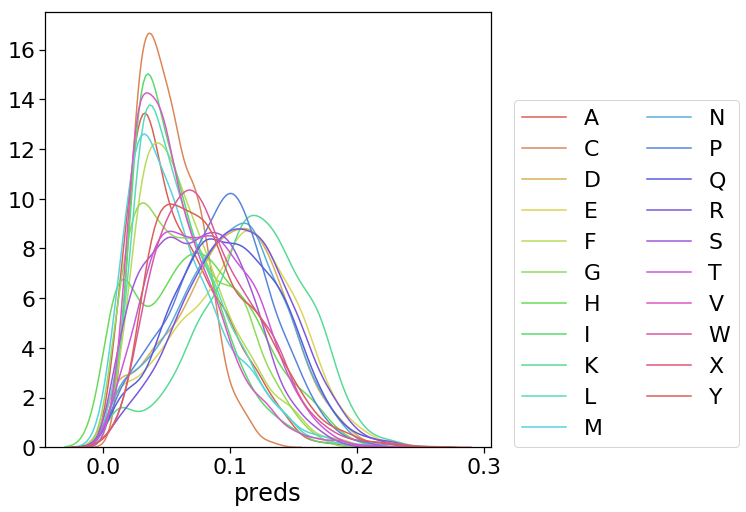

Epitope Status: 1.0


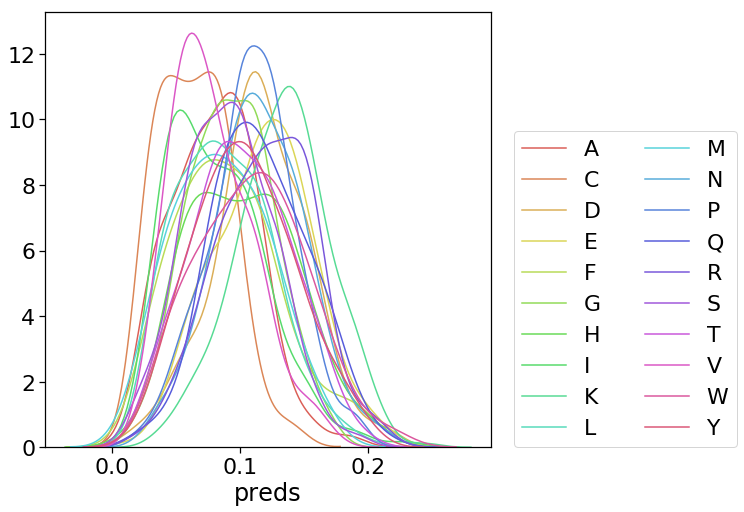

In [9]:
def plotAApredDistrib(df,groupCol='seq'):
    plt.figure(figsize=(8,8))
    for group in df.groupby(groupCol):
        sns.distplot(group[1].preds,hist=False,label=group[0])
    plt.legend(loc=[1.05,0],ncol=2)    
    plt.show()
    
for group in df_master.groupby('epitope'):
    print("Epitope Status: %.1f"%group[0])
    plotAApredDistrib(group[1])

### Comparing prediction score distributions for epitopes and background of amino acids.
There is also a difference in the overlap of the positive and negative distributions for amino acids. Indicating that the method is better at decerning between epitopes and background for some amino acids.

Amino acid: A


/Users/s112800/Envs/epitope/lib/python3.5/site-packages/scipy/stats/stats.py:1625: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


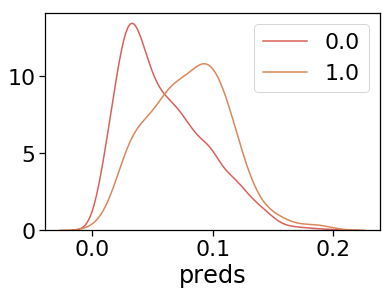

Amino acid: C


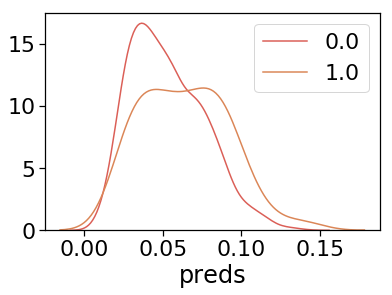

Amino acid: D


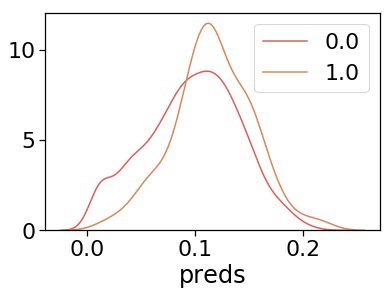

Amino acid: E


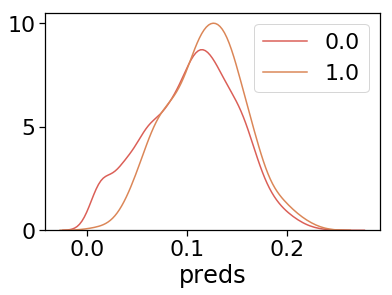

Amino acid: F


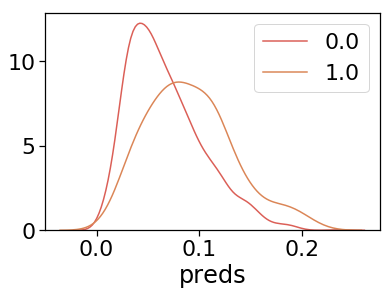

Amino acid: G


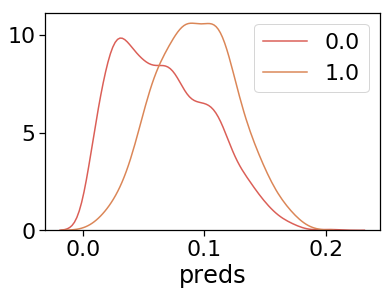

Amino acid: H


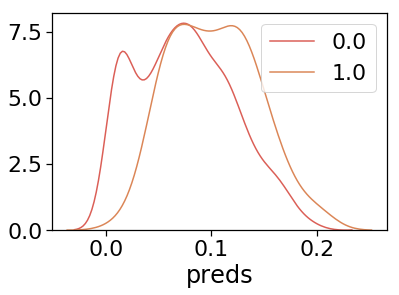

Amino acid: I


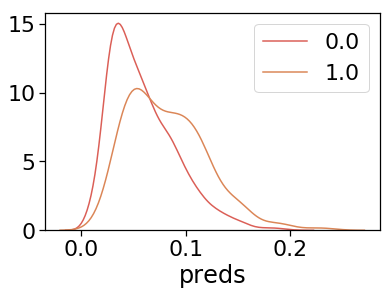

Amino acid: K


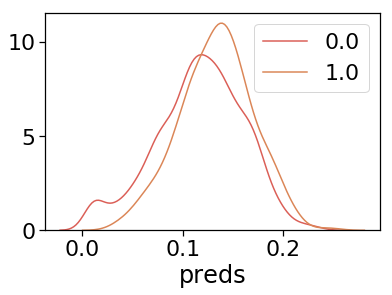

Amino acid: L


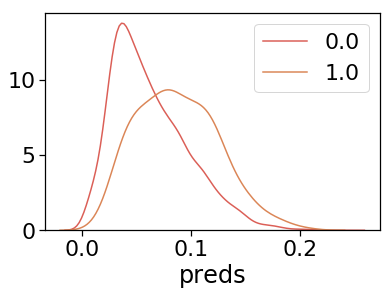

Amino acid: M


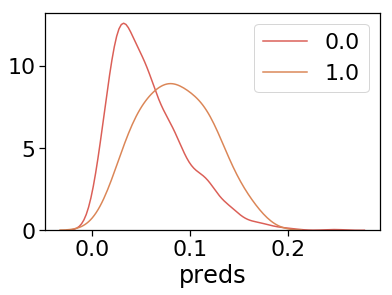

Amino acid: N


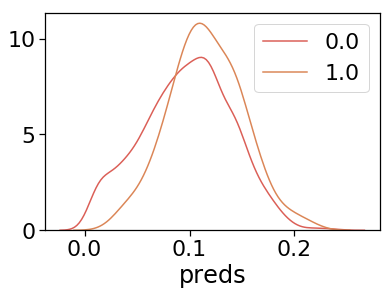

Amino acid: P


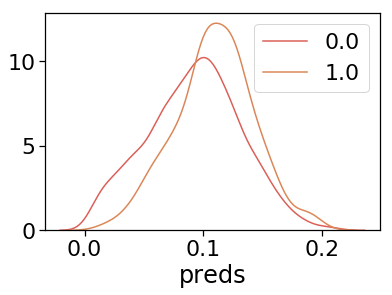

Amino acid: Q


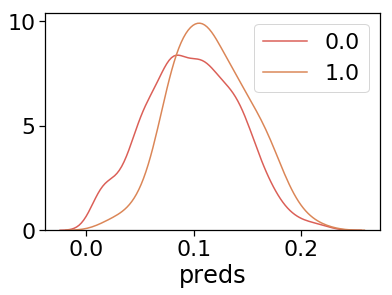

Amino acid: R


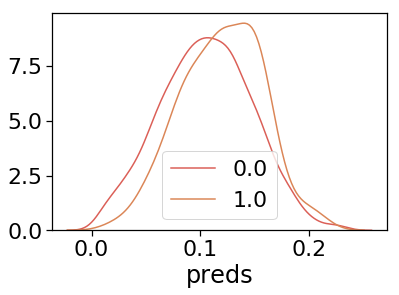

Amino acid: S


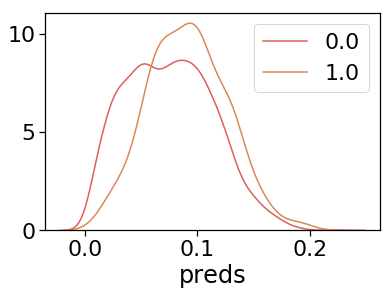

Amino acid: T


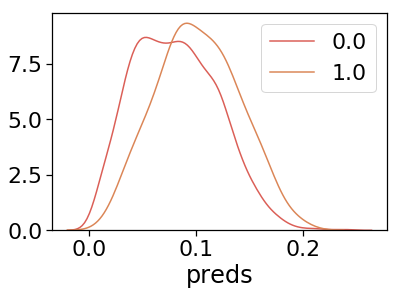

Amino acid: V


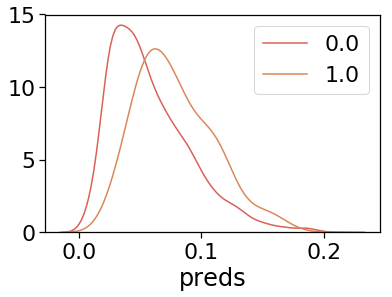

Amino acid: W


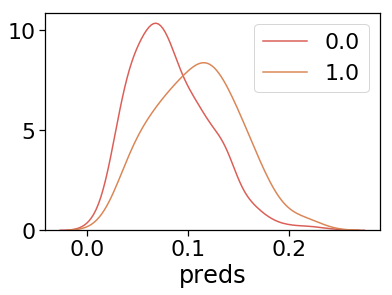

Amino acid: X


/Users/s112800/Envs/epitope/lib/python3.5/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/s112800/Envs/epitope/lib/python3.5/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


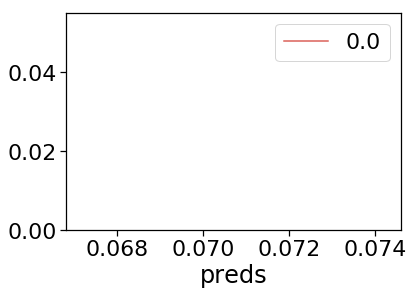

Amino acid: Y


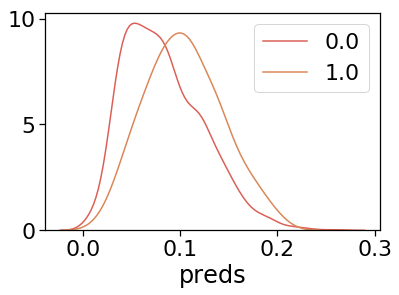

In [10]:
def comparePosNegDistrib(df,seqCol='seq',epiCol='epitope'):
    for group in df.groupby(seqCol):
        print("Amino acid: %s"%group[0])
        for group1 in group[1].groupby(epiCol):
            sns.distplot(group1[1].preds,hist=False,label=group1[0])
        plt.show()
comparePosNegDistrib(df_master)

### Comparing mean prediction score for epitopes and background for amino acids
Every point of the scatter plot falls above the identity line, indicating that for every amino acid, the mean prediction score for epitopes is higher than for non epitopes.

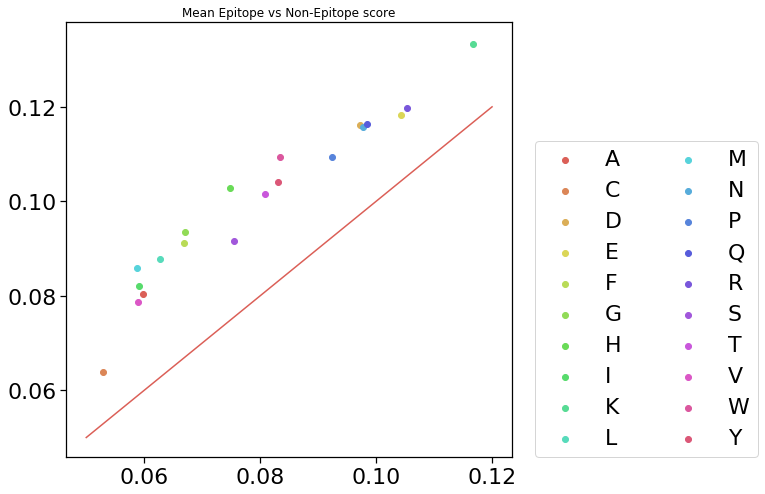

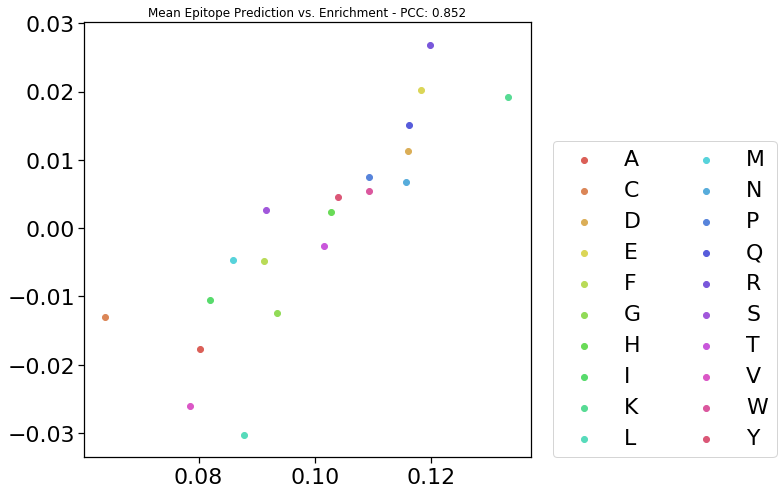

preds           AA   EpiFreq EpiDistribution NonDistribution  \
epitope       0.0       1.0                                                
seq                                                                        
A        0.059715  0.080330  A  0.060418        0.048002        0.065662   
C        0.052956  0.063943  C  0.040422        0.011936        0.024923   
D        0.097269  0.116110  D  0.096839        0.062792        0.051512   
E        0.104348  0.118365  E  0.105907        0.078620        0.058382   
F        0.066895  0.091230  F  0.072549        0.038402        0.043182   
G        0.067007  0.093470  G  0.068247        0.062013        0.074472   
H        0.074833  0.102760  H  0.087561        0.027763        0.025448   
I        0.059149  0.082060  I  0.066767        0.045926        0.056465   
K        0.116701  0.133264  K  0.106471        0.073430        0.054205   
L        0.062647  0.087796  L  0.055424        0.060716        0.091019   
M        0.058745  0.085905  M  0.062291        0.014530        0.019240   
N        0.097699  0.115767  N  0.091064        0.055527        0.048750   
P        0.092430  0.109337  P  0.092022        0.056565        0.049093   
Q        0.098381  0.116260  Q  0.109062        0.053710        0.038594   
R        0.105335  0.119776  R  0.122637        0.072392        0.045555   
S        0.075408  0.091526  S  0.083676        0.073949        0.071231   
T        0.080751  0.101558  T  0.077635        0.056565        0.059112   
V        0.058887  0.078606  V  0.052057        0.043332        0.069405   
W        0.083392  0.109359  W  0.103488        0.023093        0.017597   
Y        0.082994  0.104027  Y  0.090230        0.040737        0.036129   

        Enrichment  
epitope             
seq                 
A        -0.017660  
C        -0.012987  
D         0.011280  
E         0.020238  
F        -0.004780  
G        -0.012459  
H         0.002315  
I        -0.010538  
K         0.019225  
L        -0.030303  
M        -0.004710  
N         0.006776  
P         0.007472  
Q         0.015116  
R         0.026837  
S         0.002718  
T        -0.002548  
V        -0.026074  
W         0.005496  
Y         0.004608

In [11]:
df_meanPred = df_master.groupby(['epitope','seq'])['preds'].mean()

#Epitope frequencies
df_freq_all = df_master.groupby(['seq'])["seq"].value_counts()

total       = len(df_master['seq'].sum())
df_freq     = df_master.groupby(['epitope','seq'])["seq"].value_counts()
total_epi   = df_freq[1].sum()
total_non   = total-total_epi

#df_epi (chance of AA being an epitope) df_intra_epi (AA distribution in the epitopes)
df_epi       = df_freq[1]/df_freq_all
df_epi       = df_epi.dropna()
df_intra_epi = df_freq[1]/total_epi
df_intra_epi = df_intra_epi.dropna()
df_intra_non = df_freq[0]/total_non
df_intra_non = df_intra_non.dropna()
df_intra_non = df_intra_non.drop('X')

df_meanPred = df_meanPred.reset_index()
df_meanPred = df_meanPred.pivot(columns='epitope',index='seq')
df_meanPred = df_meanPred.dropna()
df_meanPred['AA'] = df_meanPred.index

val = df_meanPred.values

df_meanPred['EpiFreq'] = df_epi.values
df_meanPred['EpiDistribution'] = df_intra_epi.values
df_meanPred['NonDistribution'] = df_intra_non.values
df_meanPred['Enrichment']      = [ x-y for x,y  in zip(df_intra_epi.values, df_intra_non.values) ]


plt.figure(figsize=(8,8))
for i,j,k in val:
    plt.scatter(i,j,label=k)
plt.legend(loc=[1.05,0],ncol=2)

plt.plot([0.05,0.12],[0.05,0.12])#Plot identity line for comparison
plt.title('Mean Epitope vs Non-Epitope score',size=12)
plt.show()


val = df_meanPred.values
plt.figure(figsize=(8,8))
for ele in val:
    plt.scatter(ele[1],ele[6],label=ele[2])
plt.legend(loc=[1.05,0],ncol=2)
plt.title('Mean Epitope Prediction vs. Enrichment - PCC: {:.3f}'.format(scipy.stats.pearsonr([x[1] for x in val], df_meanPred['Enrichment'])[0]), size=12)
plt.show()

df_meanPred

### Logistic regression analysis
Incomplete...

In [ ]:
def splitPartitions(df,descCol='desc',testSet=1):
    cols = df.columns
    df['part'] = list(map(lambda x:int(x.split(' ')[-1]),df[descCol].values))
    df_test = df[df['part']==testSet]
    df_train = df[df['part']!=testSet]
    return df_test[cols], df_train[cols]

df_test, df_train = splitPartitions(df_master)

In [ ]:
from sklearn.linear_model import LogisticRegression

def getData(df,xCol='preds',yCol='epitope'):
    x = df[xCol].values
    x = x.reshape(-1,1)
    y = df[yCol]
    return x,y

x_test,y_test = getData(df_test)
x_train,y_train = getData(df_train)

clf = LogisticRegression(random_state=0, solver='lbfgs',).fit(x, y)
clf.score(x, y)
pred = clf.predict(x_test)


In [ ]:
for i,j in zip(y_test,pred):
    print(i,j)

## Performance evaluation of the model
AUC10 = Area under the first 10% of the curve. Used due to the unbalance in negative (n and positive (epitopes) data.

In [16]:
import utils
performances = {'AUC': list(), 'AUC10': list()}

#Combine pdbs with multiple chains
pdbs = dict()
for chain in data:
    pdbid, chainid, partition = chain['desc'].split(' ')
    if pdbid != pdbs:
        pdbs[pdbid] = {'predictions': list(),'targets': list() }
        
    pdbs[pdbid]['predictions'].extend(chain['preds'])
    pdbs[pdbid]['targets'].extend(chain['epitope'])

for pdb in pdbs:
    auc, auc10 = utils.calc_auc(pdbs[pdb]['predictions'], pdbs[pdb]['targets'], ten=True)
    performances['AUC'].append(auc)
    performances['AUC10'].append(auc10)

for measurement in sorted(performances):
    print('{}:\t{:.5f}'.format(measurement, np.mean(np.array(performances[measurement]))) )


AUC:	0.64035
AUC10:	0.09440
